In [1]:
"""
Rate of innovation: les ventes de mes innovations/ventes totales de la marque
For each marque, je regarde tous les sous-produits dans Rate of Inno.xlsx
Une innovation c’est 2 ans
Somme des sales des innovations / sales totale
Commencer à T+2 ans
"""

'\nRate of innovation: les ventes de mes innovations/ventes totales de la marque\nFor each marque, je regarde tous les sous-produits dans Rate of Inno.xlsx\nUne innovation c’est 2 ans\nSomme des sales des innovations / sales totale\nCommencer à T+2 ans\n'

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil

In [3]:
df_ino = pd.read_excel('data/Growth Modelling - USA - 2018-2021 - Rate Of Innovation (IRI).xlsx', header=7)

In [12]:
df_ino = df_ino.rename(columns = {"MAJOR BRAND_PRIBEL  [ MAJOR BRAND_PRIBEL ]":'Brand'})

In [19]:
df_ino

,Brand,2017-12-31,2018-01-07,2018-01-14,2018-01-21,2018-01-28,2018-02-04,2018-02-11,2018-02-18,2018-02-25,...,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21,2021-11-28,2021-12-05,2021-12-12,2021-12-19,2021-12-26
0,BABYBEL,653.261154,997.760739,979.590545,923.985396,1132.438645,1083.494849,1262.519468,1140.227053,1168.886715,...,30.199278,2.809189,33.373678,63.922405,67.335932,44.049667,36.651331,218.815665,53.645384,89.098639
1,BABYBEL,5203.435666,7195.351431,9382.523506,7888.842585,8446.379689,8909.100485,9208.444065,8514.697968,8533.619026,...,59285.017987,58708.303908,59656.339683,59990.544643,55010.946940,49067.480840,67250.987012,66632.086299,62521.223813,60350.254264
2,BABYBEL,178.815064,134.243008,235.468540,126.662094,198.796156,176.014000,254.727504,216.847372,234.813798,...,759.268591,634.360524,684.179298,694.976535,754.997171,608.484757,747.882508,703.938597,937.418286,558.483310
3,BABYBEL,131867.123898,181966.544875,195625.968719,185869.573570,181725.575119,225198.422192,189434.139650,196386.482929,189764.290450,...,73723.686769,82064.541778,98737.999115,110745.595492,96367.747995,74692.007921,89336.209687,88956.214895,86616.823966,78689.583061
4,BABYBEL,NaN,13.246342,NaN,4.527668,4.665016,NaN,22.950000,NaN,5.048451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,KAUKAUNA,112752.341152,58152.469101,37764.192491,33349.013801,31440.763392,40533.703637,31707.631501,26325.399660,24648.510947,...,35283.623491,37938.751504,42852.633490,51704.944233,98218.790045,110776.037387,62583.323705,79267.270767,134563.951161,184926.670464
179,KAUKAUNA,88643.091781,46254.453132,29192.236993,26380.334312,21467.192994,29074.437826,24912.155277,19134.520163,18385.778191,...,7894.199708,10076.048263,14377.584156,16976.569370,33065.217224,35707.633656,21225.471018,30530.606651,48977.475987,63442.090128
180,KAUKAUNA,NaN,NaN,NaN,NaN,NaN,NaN,4.990000,NaN,NaN,...,693.610000,6099.700000,6109.720000,7695.380000,16452.100000,17124.730000,14908.090000,18402.774554,26289.731588,21709.416770
181,KAUKAUNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.182006,NaN,NaN,5.594461,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_ino = df_ino[~df_ino['Product'].str.contains('ALL CATEGORIES')]

In [15]:
cols = [x for x in df_ino.columns if 'Week' in x]
df_ino=df_ino.rename(columns={x:dt.datetime.strftime(dt.datetime.strptime(x.split()[-1], '%m-%d-%y'), '%Y-%m-%d') for x in cols})

In [16]:
#df_ino['Brand'] = df_ino['Product'].apply(lambda x: x.split()[0])

df_ino = df_ino.drop(columns=['Product', 'Dollar Sales 2018-2021 OK'])

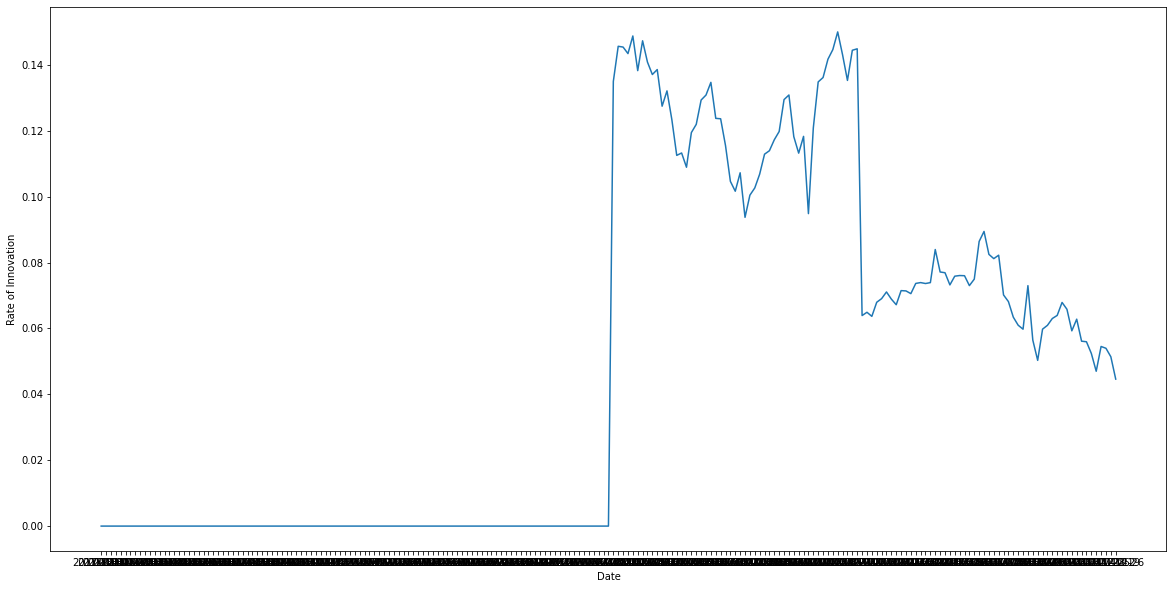

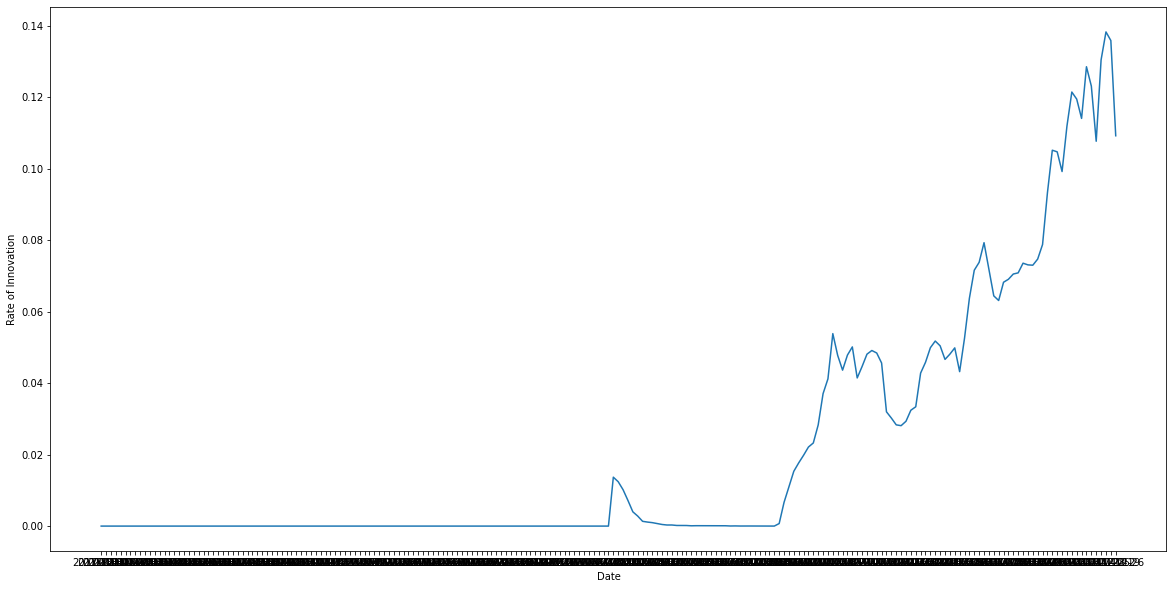

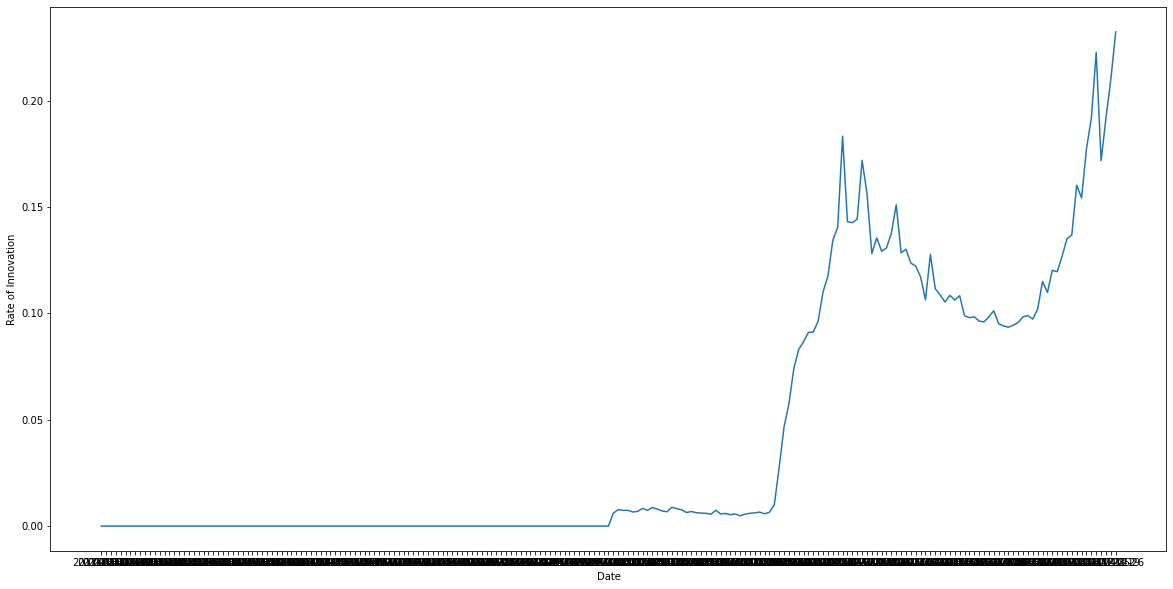

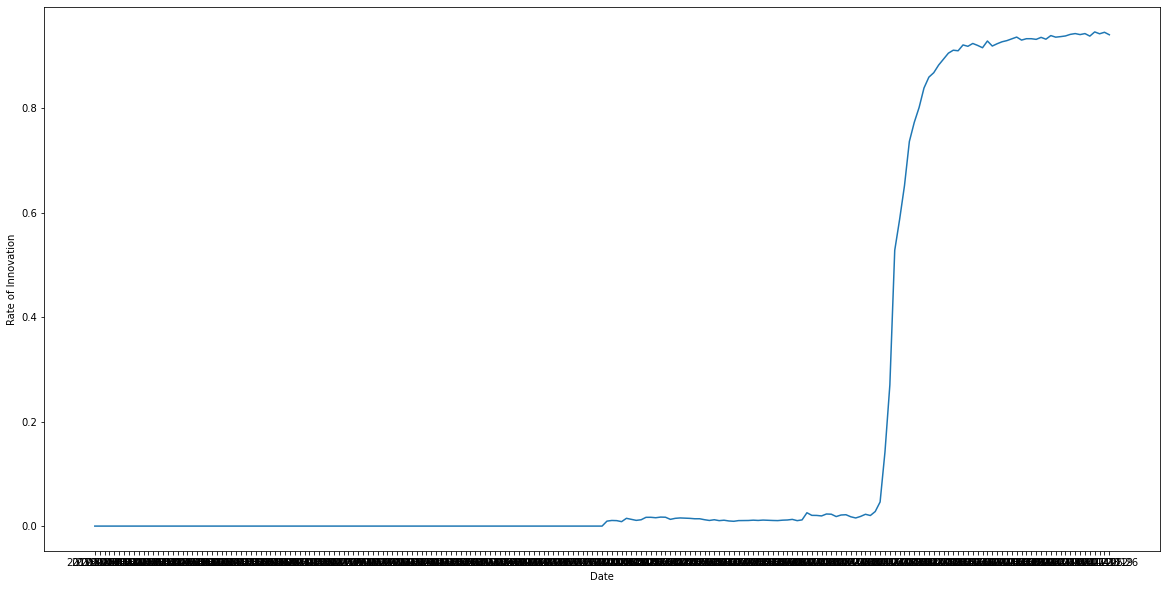

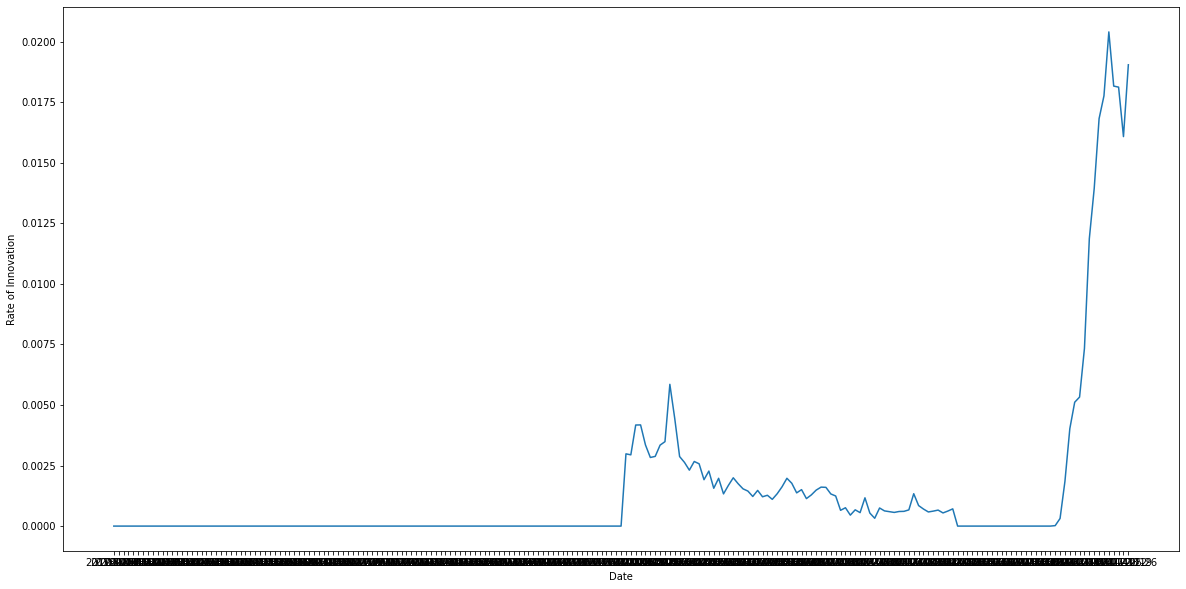

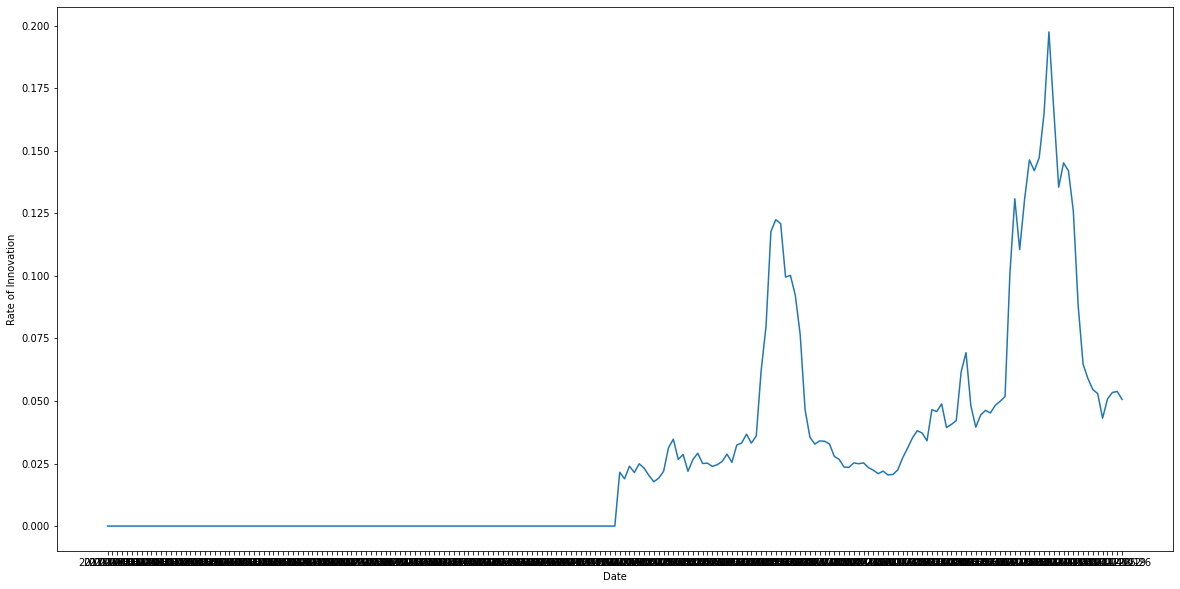

In [31]:
df_concat = pd.DataFrame()
for brand, group in df_ino.groupby(['Brand']):
    df_merge = pd.DataFrame(index=group.columns.values[:-1])
    group = group.drop('Brand', axis=1)
    for col in group.T.columns:
        first_sale = group.T[col][pd.notna(group.T[col])].index.values[0]
        
        if first_sale == '2017-12-31':
            pass
        else:
            delta = dt.timedelta(weeks=104)
            date_end = (dt.datetime.strptime(first_sale, '%Y-%m-%d') + delta).strftime('%Y-%m-%d')
            
            df_merge = pd.concat([group.T[[col]].loc[first_sale:date_end], df_merge],axis=1)
            
    df_innovation = pd.DataFrame(df_merge.reset_index().sort_values(by='index').set_index('index').sum(axis=1)).rename(columns={0:'Rate of Innovation'})
    df_innovation.loc['2015-01-01':'2020-01-01'] = 0.0
    df_innovation = df_innovation.div(group.T.sum(axis=1), axis=0)
    df_innovation['Brand'] = brand
    df_innovation = df_innovation.reset_index().rename(columns={'index':'Date'})
    df_innovation = df_innovation[df_innovation['Date']!='Brand']
    #display(df_innovation)
    
    df_concat = pd.concat([df_concat, df_innovation])
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df_innovation, x='Date', y='Rate of Innovation')
    plt.show()
    
    #display(group.T.sum(axis=1))
    